<a href="https://colab.research.google.com/github/Krukalex/Boston-Housing-Set-ML-project/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
rnd_seed=23
np.random.seed(rnd_seed)

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [ ]:
df['MEDV'] = boston_dataset.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Unimodal exploratory analysis

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##Histograms

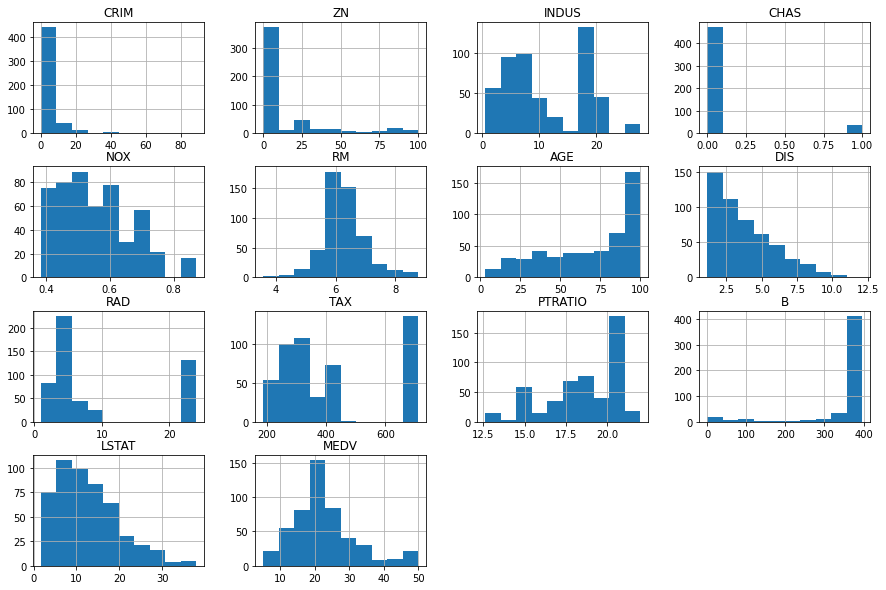

In [ ]:
df.hist(figsize=(15, 10));

RM, tax, nox, MEDV and possibly indus look normally distributed

CRIM. ZN, CHAS, RAD, AGE, DIS, PTRATIO, B, and LSTAT are definitely skewed distributions

##Density plots

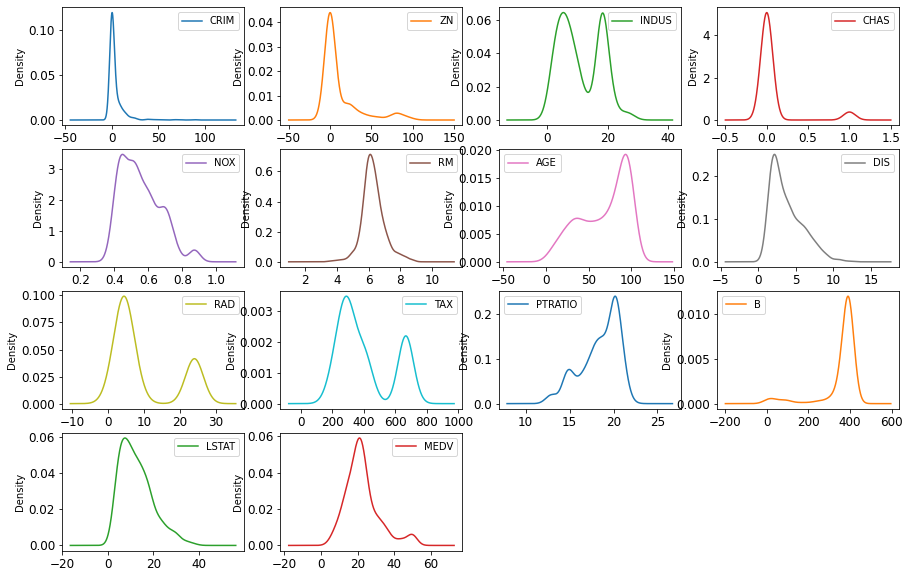

In [ ]:
df.plot(kind='density', subplots=True, figsize=(15, 10), layout=(4,4), sharex=False, sharey=False, fontsize=12);

Distributions look a little more normal when we plot the density graphs

- LSTAT, nox, rm, lstat and MDEV now all appear relatively normally distributed

- indus, rad, and tax all look nearly normal but have two distinct peaks

- crim, zn, chas, dis, ptratio, and b look to be skewed
  - crim, zn, chas and dis are right skewed
  - b is left skewed





##Boxplots

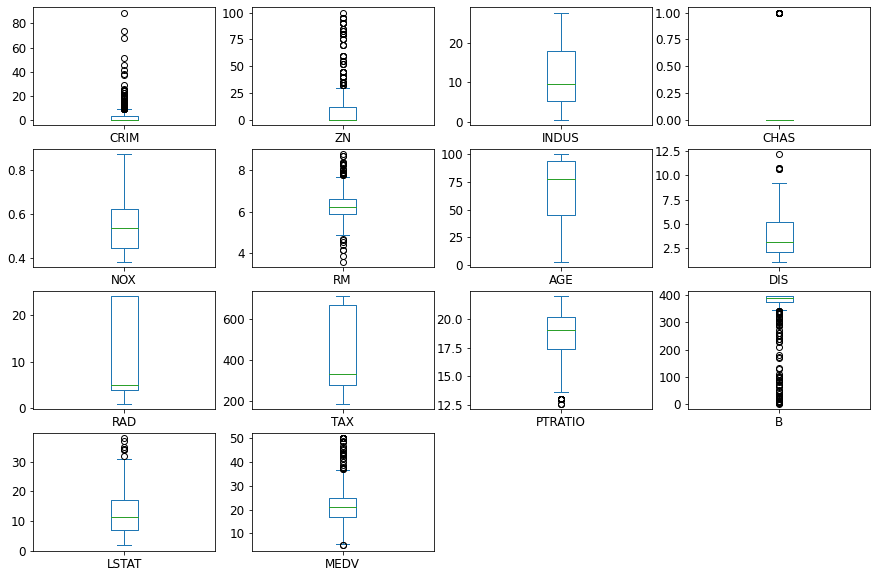

In [ ]:
df.plot(kind='box', subplots=True, figsize=(15, 10), layout=(4,4), sharex=False, sharey=False, fontsize=12);

- crim, zn, rm, b, rad and mdev have the most outliers
  - crim, zn, b and rad are also among those who have skewed distributions
  - B has a ton of outliers on the lower end
  - the outliers on rm are normally distributed around the mean
  -most of the outliers in MEDV are on the upper end
- age is skewed toward higer ages, with the mean being around 75
- chas looks like it has one massive outlier, definitely investigate that

In [ ]:
#test skewedness
from scipy.stats import skewtest

feats=list(df.columns)

for i in feats:
  print('skew for {}:'.format(i), skewtest(df[i]))

skew for CRIM: SkewtestResult(statistic=19.67154970512438, pvalue=3.7804824553883424e-86)
skew for ZN: SkewtestResult(statistic=13.25203813676775, pvalue=4.391137310493681e-40)
skew for INDUS: SkewtestResult(statistic=2.686151035239257, pvalue=0.007228040741518698)
skew for CHAS: SkewtestResult(statistic=16.412905603935535, pvalue=1.546250160399819e-60)
skew for NOX: SkewtestResult(statistic=6.120888755934693, pvalue=9.30548555733988e-10)
skew for RM: SkewtestResult(statistic=3.6165514870123805, pvalue=0.0002985539551619877)
skew for AGE: SkewtestResult(statistic=-5.172487378460267, pvalue=2.3099810753788843e-07)
skew for DIS: SkewtestResult(statistic=7.941451182730754, pvalue=1.998293556052712e-15)
skew for RAD: SkewtestResult(statistic=7.900128334504891, pvalue=2.78616414686759e-15)
skew for TAX: SkewtestResult(statistic=5.697942591016154, pvalue=1.2126186715759255e-08)
skew for PTRATIO: SkewtestResult(statistic=-6.6212418869213, pvalue=3.5619355083625606e-11)
skew for B: SkewtestRes

skewtest isnt particularly helpful since all of these are shown to be skewed, but the most skewed are crim, zn, chas, and b, as we found earlier

In [ ]:
#look into outliers for chas
#this is a categorical variable, it will only be 1 if it is on the charles river and zero otherwise
#most properties arent on the river

df.groupby('CHAS')['MEDV'].count()

CHAS
0.0    471
1.0     35
Name: MEDV, dtype: int64

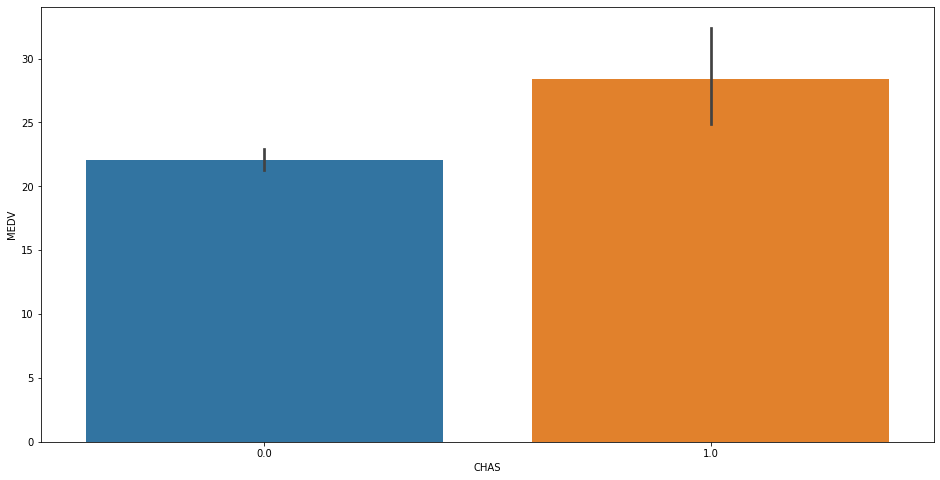

In [ ]:
#properties on the river have a higher median value

fig, ax1 = plt.subplots(1,1, figsize=(16,8))

sns.barplot(data=df, x='CHAS', y='MEDV', ax=ax1)

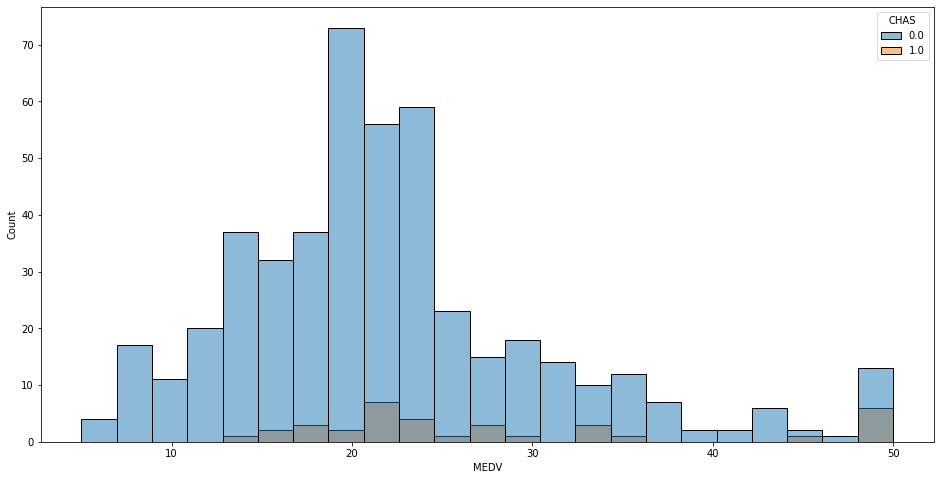

In [ ]:
#looks like most of them fall within the normal distribution range, but a higher percentage of river properties are in the top range

fig, ax1 = plt.subplots(1,1, figsize=(16,8))

sns.histplot(df, x='MEDV', hue='CHAS', ax=ax1)

#Multimodal exploratory analysis

##Correlation

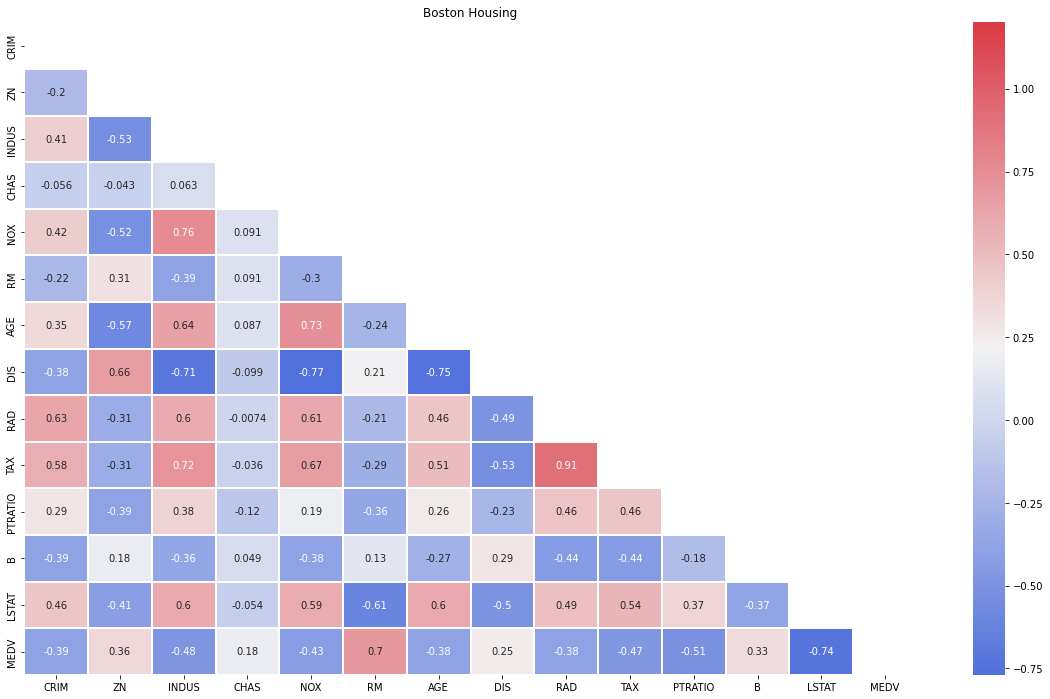

In [ ]:
corr=df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Boston Housing')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);
#sns.heatmap(corrMatt, mask=mask, vmax=1.2, square=True, annot=True, fmt='.2g', ax=ax);

- criminal activity (CRIM), number of non retail businesses (INDUS), nitris oxide levels (NOX), age, accessibility to major highway (RAD), tax, student teacher ratio (PTRATIO), and percent lower status of population (LSTAT) all negatively correlate with home value
 - lstat has the highest negative correlation with medv

- porportion of land zoned for lots over 25000 sq ft, (ZN), being river front (CHAS), number of rooms (RM), distance from employment centers (DIS), and porportion of black residents correlate positively with median home value
 - number of rooms has the highest postive correlation with medv

- dis has very strong negative correlation with indus, nox, and age
- lstat and rm have strong negative correlation with each other
- tax and rad have a very strong positive correlation with each other

##scatterplots

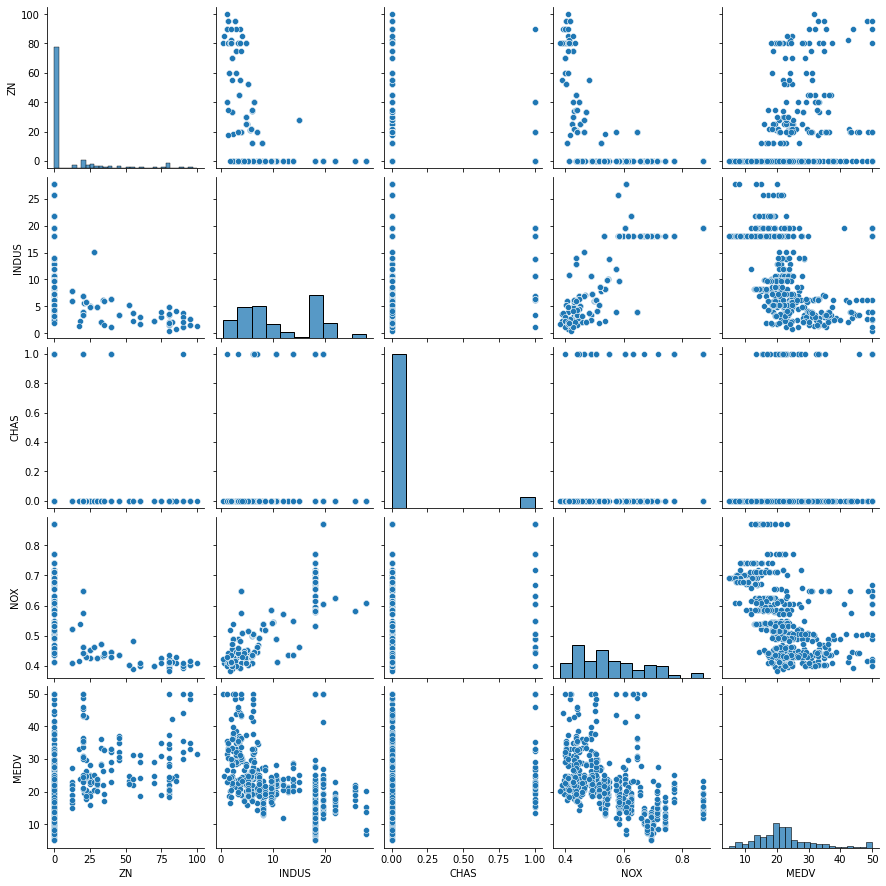

In [ ]:
sns.pairplot(df[feats[1:5] + ["MEDV"]]);

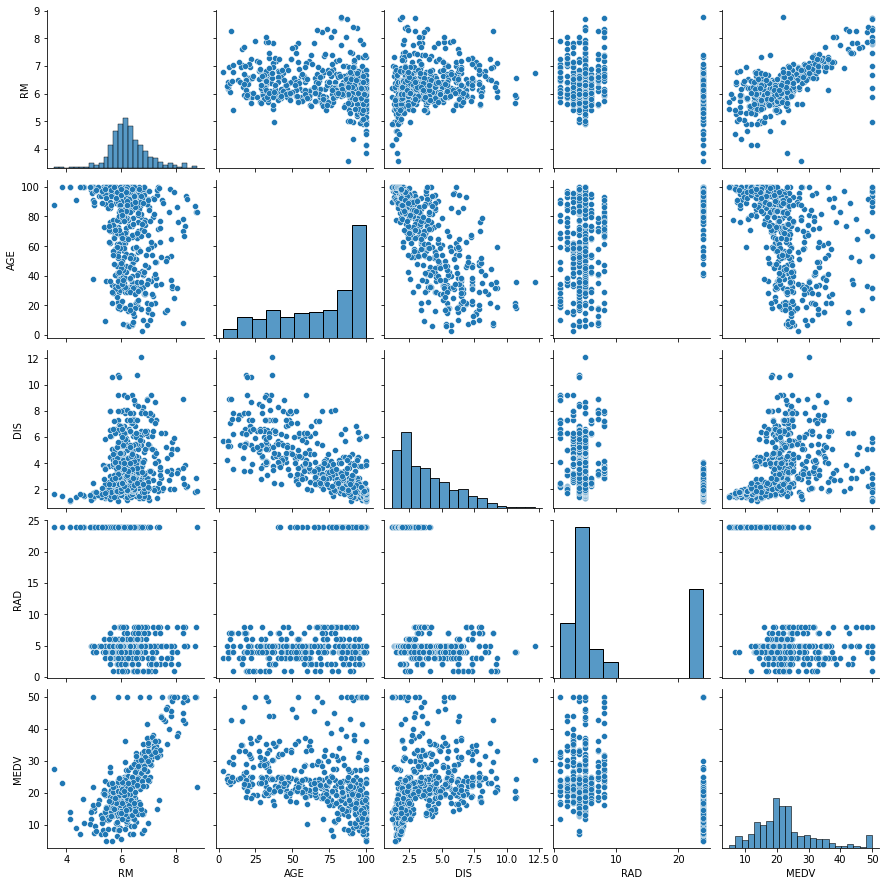

In [ ]:
sns.pairplot(df[feats[5:9] + ["MEDV"]]);

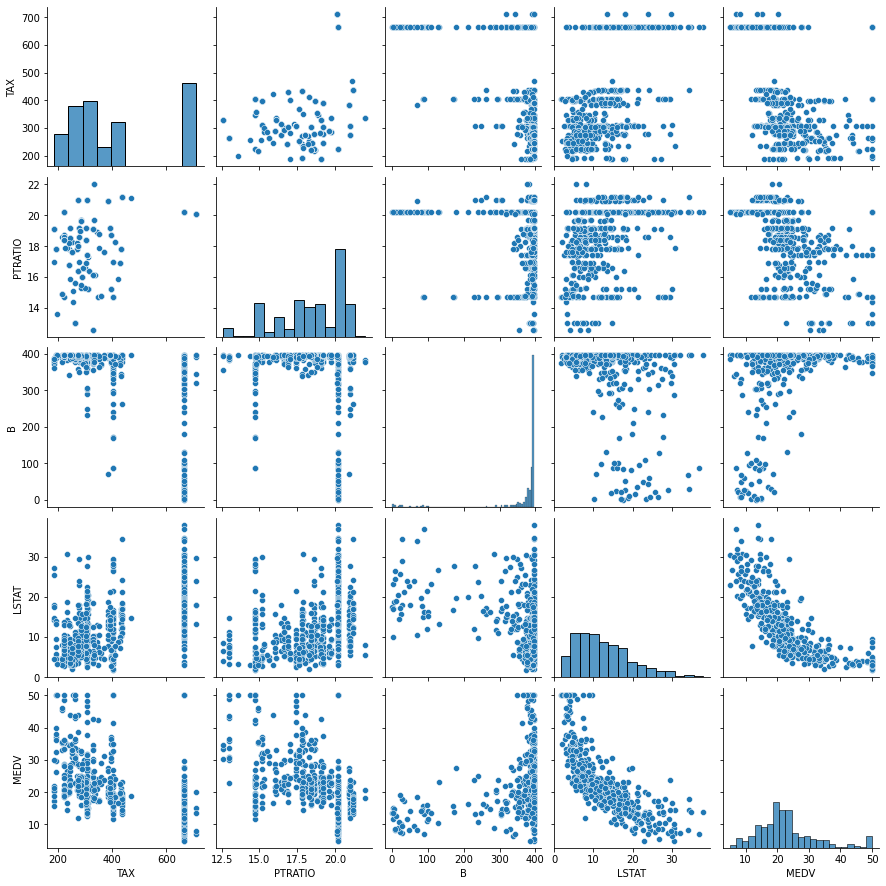

In [ ]:
sns.pairplot(df[feats[9:13] + ["MEDV"]]);

RM and lstat seem to have the highest correlation with the output

#Data Preprocessing

thoughts:
- start by performing baseline linear regression
- convert chas to categorical
-try logarithmic transformation on crim, zn, and dis
- standardize variables
- perform pca
- perform another linear regression to compare
- try random forest, gradient boosting, and possibly a neural network
- compare results

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
chas_encoded = encoder.fit_transform(df['CHAS'])

In [ ]:
df['CHAS']=chas_encoded

##Linear regression using all variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
X=df.drop('MEDV', axis=1)
y=df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)

preds=lr.predict(X_test)

In [ ]:
#baseline performance

rmse(preds, y_test)

5.540490745781336

In [ ]:
#look at model summart using statmodels

X2=sm.add_constant(X_train)

mod=sm.OLS(y_train,X2).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     83.35
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           3.05e-97
Time:                        15:17:13   Log-Likelihood:                -1024.1
No. Observations:                 354   AIC:                             2076.
Df Residuals:                     340   BIC:                             2130.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7304      5.690      5.576      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


looks like most of the variables seems to be significatn here, but several, like indus, chas, and age are not. We can try a model without these but im not sure how necessary that is

Try just with RM and LSTAT, since those are the most significant

In [ ]:
X=df[['RM', 'LSTAT']]
y=df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)

preds=lr.predict(X_test)

In [ ]:
#not substantially worse performance only using these two variables
#if nothing else, this indicates that PCA is necessary

rmse(preds, y_test)

6.041044703455955

##Principal Component Analysis

do some analysis to determine how many principal components we should use

In [ ]:
#perform logarithmic transformation on crim, zn and dis

df2=df.copy()
log=['CRIM', 'ZN', 'DIS']

for i in log:
  df2[i]=np.log(df2[i] +1)

In [ ]:
X=df2.drop('MEDV', axis=1)
y=df2['MEDV']

In [ ]:
feature_names = list(X.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

# dimensionality reduction
pca = PCA(n_components=10)

Xs_pca = pca.fit_transform(Xs)

In [ ]:
#build a dataframe using the first two principal components
#sample 5 values from each principal component

PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]
PCA_df.sample(5)

,PCA_1,PCA_2
290,-3.284488,-0.861540
182,-1.661003,1.156593
494,-0.142831,-0.222295
123,1.281109,0.721040
406,4.564166,-1.116038


How many PCAs to retain

We can use scree plots to show how much variation each PCA accounts for

In [ ]:
# PCA explained variance - The amount of variance that each PC explains
var_exp = pca.explained_variance_ratio_
var_exp

array([0.51190689, 0.10296479, 0.09651541, 0.06631131, 0.06264289,
       0.05095944, 0.03126012, 0.02293745, 0.017052  , 0.01366402])

In [ ]:
# Cumulative Variance explains

cum_var_exp = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))
cum_var_exp

array([0.5119, 0.6149, 0.7114, 0.7777, 0.8403, 0.8913, 0.9226, 0.9455,
       0.9626, 0.9763])

In [ ]:
# combining above two
var_exp_ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios_df = pd.DataFrame(np.round(var_exp_ratios, 4), columns = ['Explained Variance'])
variance_ratios_df['Cumulative Explained Variance'] = variance_ratios_df['Explained Variance'].cumsum()

# Dimension indexing
dimensions = ['PCA_Component_{}'.format(i) for i in range(1, len(pca.components_) + 1)]

variance_ratios_df.index = dimensions
variance_ratios_df

,Explained Variance,Cumulative Explained Variance
PCA_Component_1,0.5119,0.5119
PCA_Component_2,0.1030,0.6149
PCA_Component_3,0.0965,0.7114
PCA_Component_4,0.0663,0.7777
PCA_Component_5,0.0626,0.8403
PCA_Component_6,0.0510,0.8913
PCA_Component_7,0.0313,0.9226
PCA_Component_8,0.0229,0.9455
PCA_Component_9,0.0171,0.9626
PCA_Component_10,0.0137,0.9763


looks like the first 3 components explain most of the variance

lets look at the scree plot

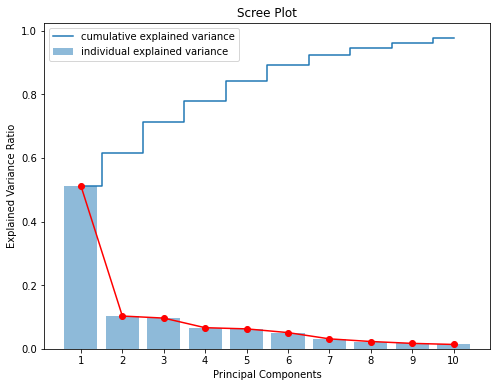

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.components_) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(pca.components_) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.plot(range(1, len(pca.components_) + 1), var_exp, 'ro-')
plt.xticks(range(1, len(pca.components_) + 1))
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.legend(loc='best');

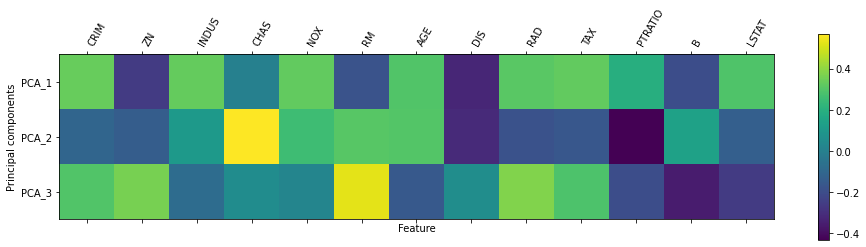

In [ ]:
# vizualizing principle components as a heatmap this allows us to see what dimensions in the 'original space' are active

plt.matshow(pca.components_[0:3])
plt.yticks([0, 1, 2], ["PCA_1", "PCA_2", "PCA_3"])
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

Hoenstly could try simply using one principal component. I will compare the results using a 1, 2, and 3 PC

I tried running the pipline below using various numbers of principal components, and in all cases the predictive power was significantly worse than simply using all 10 variables. There aren't a ton of features in this dataset, so it might not be necessary to do something like PCA

#Testing

##Transformation pipeline

In [ ]:
#perform logarithmic transformation on crim, zn and dis

df2=df.copy()
log=['CRIM', 'ZN', 'DIS']

for i in log:
  df2[i]=np.log(df2[i] +1)

In [ ]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,2.31,0,0.538,6.575,65.2,1.627278,1.0,296.0,15.3,396.90,4.98,24.0
1,0.026944,0.000000,7.07,0,0.469,6.421,78.9,1.786261,2.0,242.0,17.8,396.90,9.14,21.6
2,0.026924,0.000000,7.07,0,0.469,7.185,61.1,1.786261,2.0,242.0,17.8,392.83,4.03,34.7
3,0.031857,0.000000,2.18,0,0.458,6.998,45.8,1.954757,3.0,222.0,18.7,394.63,2.94,33.4
4,0.066770,0.000000,2.18,0,0.458,7.147,54.2,1.954757,3.0,222.0,18.7,396.90,5.33,36.2


Create pipeline that standardizes numerical data and encodes categorical data

In [ ]:
X=df2.drop('MEDV', axis=1)
y=df2['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
from sklearn.compose import make_column_selector as selector

In [ ]:
#seperate numerical and categorical data

categorical_columns_selector = selector(dtype_exclude=float)
numerical_columns_selector = selector(dtype_include=float)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [ ]:
#create transformers that do desired task

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()


In [ ]:
#define combination of desired transformations together
#I tried implementing PCA, and the code that creates it is still listed below, but, it ended up making the model perform a lot worse, so I ditched it

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
forest=RandomForestRegressor(n_estimators = 100, random_state = 24)

pca_tf=PCA(n_components=5)

pipe=Pipeline([('pre', preprocessor), ('model', forest)])

In [ ]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CHAS']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['CRIM', 'ZN', 'INDUS', 'NOX',
                                                   'RM', 'AGE', 'DIS', 'RAD',
                                                   'TAX', 'PTRATIO', 'B',
                                                   'LSTAT'])])),
                ('model', RandomForestRegressor(random_state=24))])

In [ ]:
preds=pipe.predict(X_test)

In [ ]:
rmse(preds, y_test)

3.244298619025653

In [ ]:
mean_squared_error(preds, y_test)

10.525473529411759

try using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')

In [ ]:
np.mean(scores)

-3.2213799406258783

cross validation score is very simialr to holdout method

In [ ]:
#attempting grid search for best parameters for random forest
#this didnt work just threw me a bunch of NAN values

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = { 
    'model__n_estimators': [200, 500],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8],
    'model__criterion' :['squared_error', 'absolute_error', 'poisson']
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_score_)

In [ ]:
##trying different methods

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

for i in models:
  pipe=Pipeline([('pre', preprocessor), ('model',models[i])])
  pipe.fit(X_train, y_train)
  preds=pipe.predict(X_test)
  print('{} RMSE:'.format(i), rmse(preds, y_test))


Linear RMSE: 4.306142370967558
Lasso RMSE: 4.883666469128381
ElasticNet RMSE: 4.868016768621416
KNN RMSE: 3.464340471426096
DecisionTree RMSE: 5.415048023613383
SVR RMSE: 4.59329764847091
AdaBoost RMSE: 3.4192627447434587
GradientBoost RMSE: 3.038744230879705
RandomForest RMSE: 3.3235338681212525
ExtraTrees RMSE: 3.1992902062065895


Gradient boosting seems like the best model

##Using neural network

In [ ]:
X=df2.drop('MEDV', axis=1)
y=df2['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 3.7503
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 3.8239
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 3.5347
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 3.5739
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 4.1603
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 3.7624
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 3.5365
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 3.3787
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 3.4800
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 3.4818
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 3.3370
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 3.2258
Epoch 13/100
13/13 [=================

In [ ]:
preds=model.predict(X_test)

In [ ]:
preds=preds.reshape(102)

In [ ]:
rmse(preds, y_test)

3.0654800984116313

Neural network produces the lowest root mean squared error at 2.75